In [0]:
%tensorflow_version 1.x


In [0]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data=input_data.read_data_sets("./data",one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [0]:
num_training=mnist_data.train.num_examples
num_testing=mnist_data.test.num_examples
num_validation=mnist_data.validation.num_examples

In [0]:
print(num_training)

55000


In [0]:
n_input=784
n_hidden1=512
n_hidden2=256
n_hidden3=128
n_output=10


In [0]:
learning_rate=0.01
epochs=300
batch_size=128
keep_prob=tf.placeholder(tf.float32)

In [0]:
X=tf.placeholder(tf.float32,shape=(None,n_input))
y=tf.placeholder(tf.float32,shape=(None,n_output))

In [0]:
nn_weight={'W1':tf.Variable(tf.truncated_normal([n_input,n_hidden1],stddev=0.1),tf.float32),
            'W2':tf.Variable(tf.truncated_normal([n_hidden1,n_hidden2],stddev=0.1)),
            'W3':tf.Variable(tf.truncated_normal([n_hidden2,n_hidden3],stddev=0.1)),
            'Wout':tf.Variable(tf.truncated_normal([n_hidden3,n_output],stddev=0.1))
}

nn_bias={'B1':tf.Variable(tf.truncated_normal([n_hidden1]),tf.float32),
            'B2':tf.Variable(tf.truncated_normal([n_hidden2])),
            'B3':tf.Variable(tf.truncated_normal([n_hidden3])),
            'B4':tf.Variable(tf.truncated_normal([n_output]))
}



In [0]:
nn_layer1=tf.add(tf.matmul(X,nn_weight["W1"]),nn_bias['B1'])
nn_layer2=tf.add(tf.matmul(nn_layer1,nn_weight["W2"]),nn_bias['B2'])
nn_layer3=tf.add(tf.matmul(nn_layer2,nn_weight["W3"]),nn_bias['B3'])
layer_drop=tf.nn.dropout(nn_layer3,keep_prob)
output_layer=tf.add(tf.matmul(layer_drop,nn_weight["Wout"]),nn_bias["B4"])

In [0]:
with tf.name_scope("loss"):
  xentropy=tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer,labels=y)
  loss=tf.reduce_mean(xentropy,name='loss')

In [0]:
training_op=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
optimizer=training_op.minimize(loss)

In [0]:
prediction_out=tf.equal(tf.argmax(output_layer,1),tf.argmax(y,1))

nn_accuracy=tf.reduce_mean(tf.cast(prediction_out,tf.float32))

In [0]:
init=tf.global_variables_initializer()
saver=tf.train.Saver()

In [0]:
#EXECUTION

with tf.Session() as sess:
  sess.run(init)

  for epoch in range(epochs):
        mini_batch_x,mini_batch_y=mnist_data.train.next_batch(batch_size)
        mini_batch_xval,mini_batch_yval=mnist_data.validation.next_batch(batch_size)

        sess.run(optimizer,feed_dict={X:mini_batch_x,y:mini_batch_y,keep_prob:1})
        
        if epoch%100==0:
          mini_batch_loss,mini_batch_accuracy=sess.run([loss,nn_accuracy],feed_dict={X:mini_batch_x,y:mini_batch_y,keep_prob:1})
          mini_batch_val_loss,mini_batch_val_accuracy=sess.run([loss,nn_accuracy],feed_dict={X:mini_batch_xval,y:mini_batch_yval,keep_prob:1})

          print("Iteration:",epoch, "Batch accuracy:", mini_batch_accuracy, "Val accuracy:", mini_batch_val_accuracy)
          
  test_accuracy=sess.run(nn_accuracy,feed_dict={X:mnist_data.test.images,y:mnist_data.test.labels,keep_prob:1})
  print(test_accuracy)
  save_path=saver.save(sess,"./model/my_model.ckpt")
  

Iteration: 0 Batch accuracy: 0.140625 Val accuracy: 0.1171875
Iteration: 100 Batch accuracy: 0.890625 Val accuracy: 0.8359375
Iteration: 200 Batch accuracy: 0.875 Val accuracy: 0.8828125
0.8829
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool


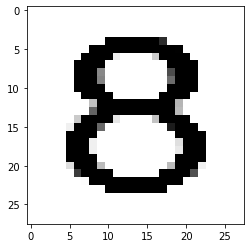

(28, 28)

In [0]:
img=cv2.imread("8.jpg")
gray_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

rescaled_image=cv2.resize(gray_image,(28,28))
plt.imshow(rescaled_image,cmap='gray')
plt.show()

rescaled_image.shape


In [0]:
dum=rescaled_image.reshape(1,-1)/255
dum.shape


(1, 784)

In [0]:
with tf.Session() as sess:
  saver.restore(sess,"./model/my_model.ckpt")
  Z=output_layer.eval(feed_dict={X:dum,keep_prob:1.0})
  y_pred=np.argmax(Z,axis=1)
  print(y_pred)

INFO:tensorflow:Restoring parameters from ./model/my_model.ckpt
[8]
